# Diskrétní řízení

## Diferenciál funkce

Tak jako derivace ve spojitých systémech, v diskrétních se používá diference. Jelikož nejmenší detekovatelný rozdíl je pro nás čas vzorkování, použijeme definici, že diferenciál je poměr přírůstku ku vzorkování. Více viz obrázek.

<img src="Diskrétní řízení\diferencial_funkce.GIF" width=500>

### Dopředná diference
$$ \Delta f(k)=f(k+1)-f(k) $$
$$ \Delta ^2 f(k)= \Delta f(k+1)-\Delta f(k) = f(k+2)-2f(k+1)+f(k) $$

### Zpětná diference
$$ \Delta f(k)=f(k)-f(k-1) $$
$$ \Delta ^2 f(k)= \Delta f(k)-\Delta f(k-1) = f(k)-2f(k-1)+f(k-2) $$

## Diferenční rovnice 

Systém můžeme definovat tak, že každá hodnota je určitou kombinací hodnot předešlých a vstupů. U spojitých systému je to také pravda, ale jde o infinitezimálně malý krok.

$$
\begin{aligned} a_{n} \Delta^{n} y(k) &+a_{n-1} \Delta^{n-1} y(k)+\ldots+a_{1} \Delta y(k)+a_{0} y(k)=\beta_{m} \Delta^{m} u(k)+\beta_{m-1} \Delta^{m-1} u(k)+\ldots+\beta_{1} \Delta u(k)+\beta_{0} u(k) \end{aligned}
$$

## Diferenční rovnice v rekurentním tvaru

Při vyvozování vztahů můžeme vždy za hodnotu diference dosadit přímou hodnotu předchozích členů. Y(k) můžeme například vyjádřit jako násobek y(k - 1), to zase můžeme vyjádřit jako násobek y(k - 2).

### Diferenční rovnice s kladným posunutím

$$
\begin{aligned} a_{n} y(k+n)+\ldots &+a_{1} y(k+1)+a_{0} y(k)=b_{m} u(k+m)+\ldots+b_{1} u(k+1)+b_{0} u(k) \end{aligned}
$$

### Diferenční rovnice se záporným posunutím
$$
\begin{aligned} a_{0} y(k)+& a_{1} y(k-1)+\ldots+a_{n} y(k-n)=\\ &=b_{0} u(k)+b_{1} u(k-1)+\ldots+b_{m} u(k-m) \end{aligned}
$$

# Vzorkování

Je důležité držet se Shannonova teorému - Vzorkovací frekvence musí být alespoň dvakrát větší něž nejvyšší frekvence obsažená v signálu.

Jedna z možných definic optimálního vzorkování.

$$ T_{opt}=\frac{50\cdot\tau\cdot T_p}{y_{max}-y_{min}}$$

Nebo experimantálně - pokus / omyl


# První jednoduchý příklad

Jak bude vypadat systém pospaný rovnicí

$$ y(k)= a \cdot y(k-1) + c $$
Kde y0 = 3 a **a** se rovná buď 0.3 a nebo -0.3.
Jaký vliv bude mít parametr a, vzorkování, počáteční podmínka a bias? Znázorněte...


<IPython.core.display.Javascript object>


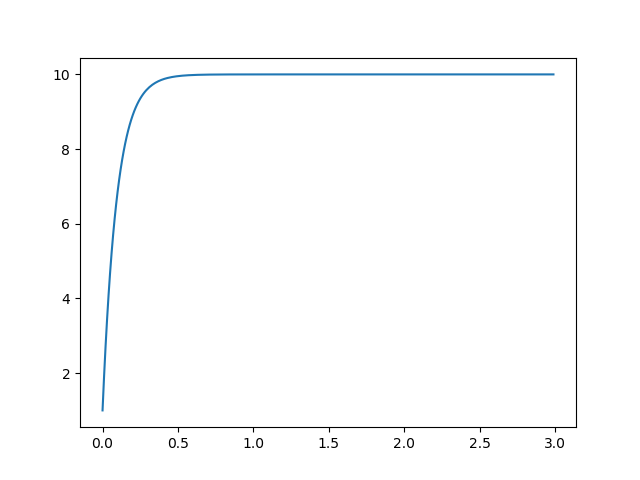

interactive(children=(SelectionSlider(description='dt', index=1, options=(('0.001', 0.001), ('0.01', 0.01), ('…

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import ipywidgetsdgets

plt.figure()
def make_y(dt, y0, a, b):
    t = np.arange(0, 3, dt)
    y = [y0]
    for i in range(1, len(t - 1)):
        y.append(y[i - 1] * a + b)
    
    plt.clf()
    plt.plot(t, y)
    plt.show()

dt_sel = [0.001, 0.01, 0.1, 1]
ipywidgets.interact(make_y, dt = ipywidgets.SelectionSlider(options=[("%g"%i,i) for i in dt_sel], value=0.01),
                            y0 = ipywidgets.IntSlider(min=0, max=5, step=1, value=1),
                            a=ipywidgets.FloatSlider(min=0.1, max=1.5, step=0.1, value=0.9),
                            b=ipywidgets.FloatSlider(min=0, max=5, step=0.1, value=1));


!!! Z výsledku je jasně vidět, že daný popis platí pouze pro určité vzorkování. Změníme-li vzorkování, dostaneme úplně jiný systém !!!

# Další příklad

Máme takovýto systém

$$
y(k)-0,55 \cdot y(k-1)=0,35 u(k-1)
$$

vypočtěte odezvu na takovýto vstup u
<img src="Diskrétní řízení/Untitled.png">

Otázka... jaký vliv bude mít hodnota parametru b před vstupem u vliv na tvar funkce?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.1
t = np.arange(0, 20, dt)

u = np.zeros(len(t))
y = np.zeros(len(t))

a = 0.55
b = 0.35

for i in range(len(u)):
    if t[i] > 1 and t[i] < 5 or t[i] > 10 and t[i] < 15:
        u[i] = 1

for i in range(1, len(t)):
    y[i] = a * y[i-1] + b * u[i - 1]
    
plt.plot(t, y)
plt.show()    

Jak je vidět, tak vliv parametru b má vliv pouze na výslednou amplitudu, v případě že máme vstup pouze prvního řádu, tak v rovnici vystupuje stejným způsobem jako bias.


## Převod systému ze spojitého na diskrétní

Mějme soustavu, jejíž diferenciální popis je

$$T_1 \cdot y'(t)+y(t)=K_s \cdot u(t)$$

Běžně je systém popsán Laplacovou transformací. Laplacův obraz vypadá takto

$$F(p)=\frac{K_S}{1+p \cdot T_1}$$

Laplacův obraz pro nenulové počáteční podmínky je 

$$
\mathbf{L}\left\{\left(^{n}\right)\right\}=\mathbf{p}^{n} F(p)-p^{n-1} \mathbf{f}(0)-p^{n-2} \mathbf{f}^{\prime}(0)-\ldots \ldots p f^{(n-2)}(0)-\mathbf{f}^{(n-1)}(0)
$$

$$
{\mathrm{T}_{1} \mathrm{pY}(\mathrm{p})-\mathrm{T}_{1} \mathrm{y}(0)+\mathrm{Y}(\mathrm{p})=\mathrm{K}_{\mathrm{S}} \mathrm{U}(\mathrm{p})} 
$$

$$
\mathrm{Y}(\mathrm{p})=\frac{\mathrm{K}_{\mathrm{S}} \mathrm{U}(\mathrm{p})+\mathrm{T}_{1} \mathrm{y}(0)}{1+\mathrm{p} \mathrm{T}_{1}}
$$

Víme, že počáteční podmínka je hodnota v minulém kroce, což je pro nás konstanta. Laplacův obraz konstanty c je $ \frac {c}{p} $
Po dosazení

$$
\mathrm{Y}(\mathrm{p})=\frac{\mathrm{K}_{\mathrm{S}} \mathrm{u}(\mathrm{k})}{\mathrm{p}\left(1+\mathrm{p} \mathrm{T}_{1}\right)}+\frac{\mathrm{T}_{1} \mathrm{y}(\mathrm{k})}{1+\mathrm{p} \mathrm{T}_{1}}
$$

Chceme li hodnotu v okamžiku k, potom provedeme inverzní Laplacovu transformaci, což může vypadat takto

$$
\mathrm{y}(\tau)_{\mathrm{k}}=\mathrm{K}_{\mathrm{S}} \mathrm{u}(\mathrm{k})\left(1-\mathrm{e}^{-\frac{\tau}{\mathrm{T}_{1}}}\right)+\mathrm{y}(\mathrm{k}) \mathrm{e}^{-\frac{\tau}{\mathrm{T}}}
$$

Nyní se vrátíme k původní definici diferenční rovnice kde y v čase k je konstanta krát y v předchozím kroku + konstanta krát vstup.

$$y(k)+a \cdot y(k-1)=b \cdot u(k-1)$$

Vidíme z předchozího co máme dosadit za a a za b.

<br>

<span style="display: inline-block; width: 30%; margin-left: 20%;">
$$a=-e^{- \frac {T}{T_1}}$$
</span>


<span style="display: inline-block; width: 30%">
$$b=K_S (1-D)$$
</span>

Vypočtené koeficienty platí pouze pro dané vzorkování...

# Příklad

Vyšetřete přechodovou charakteristiku systému s parametry: Ks = 2,  T1 =  1s, perioda vzorkování T = 0,2s, y(0) = 0 a vyjádřete v diferenční formě.

Rovnice popisující systém je tedy 
$$T_1 \cdot y'(t)+y(t)=K_s \cdot u(t)$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import e
from IPython.display import display, Math, Latex

ks = 2
t1 = 1
dt = 0.2
y0 = 0

d = e**(-dt/t1)
a = - d

b = ks * (1 - d)
print('a = ', a, '\t b = ', b, '\n\nPotom diferenční rovnice je ')

display(Math(r'y(k) = -0.819 \cdot y(k-1)+0.18 \cdot u(k-1)'))

t = np.arange(0, 20, dt)
u = np.ones(len(t)) 
y = np.zeros(len(t))

a = 0.82
b = 0.18


for i in range(1, len(y)):
    y[i] = a * y[i - 1] + b * u[i - 1]

plt.plot(t, y)
plt.show()

a =  -0.8187307530779818 	 b =  0.36253849384403636 

Potom diferenční rovnice je 


<IPython.core.display.Math object>

# Příklad

Dejme tomu, že máme RL obvod. Nejdříve vyřešíme analyticky.

$$
R i+L \frac{\mathrm{d} i}{\mathrm{d} t}=U
$$

Nejdříve vyřešíme pro pravou stranu = 0
$$
R i+L \frac{\mathrm{d} i}{\mathrm{d} t}=0
$$

$$
i=K_{1} \mathrm{e}^{-\frac{R}{L} t}
$$

Tento výsledek derivujeme a dosadíme do úplné rovnice.

$$
\begin{array}{c}{\frac{\mathrm{d} i}{\mathrm{d} t}=K_{1}^{\prime}(t) \mathrm{e}^{-\frac{R}{L} t}-K_{1}(t) \frac{R}{L} \mathrm{e}^{-\frac{R}{L} t}} \\ {R K_{1}(t) \mathrm{e}^{-\frac{R}{L} t}+L\left(K_{1}^{\prime}(t) \mathrm{e}^{-\frac{R}{L} t}-K_{1}(t) \frac{R}{L} \mathrm{e}^{-\frac{R}{L} t}\right)=U}\end{array}
$$

Dopočítáme konstanty a dostaneme se k výsledku

$$
i=\frac{U}{R}\left(1-\mathrm{e}^{-\frac{R}{L} t}\right)
$$

Jaký může mít vliv volba R, U a L je možné zobrazit například v nástroji DESMOS, který je pro seznámení se a pochopení matematického modelu vhodnější. Lze se podívat na [RC circuit](https://www.desmos.com/calculator/etmdubgwhw). Printscreen vypadá takto

<img src="Diskrétní řízení\desmos.png" width=650>

Nyní, když známe přesné řešení, můžeme porovnat s diskrétním modelem s různým vzorkováním. V následující ukázce je také ukázan vliv velikosti učícího kroku a počtu epoch.

### Diskrétní verze daného spojitého systému - identifikace

<IPython.core.display.Javascript object>


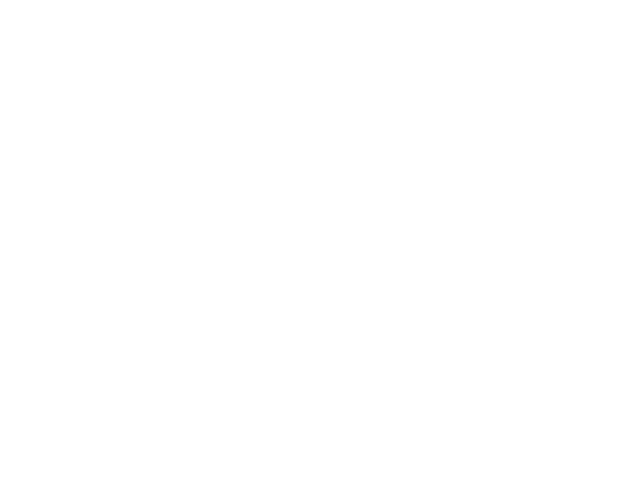

interactive(children=(SelectionSlider(description='dt', index=1, options=(('0.001', 0.001), ('0.01', 0.01), ('…

In [4]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from math import e
import sympy as sp
from mpmath import e
import ipywidgets
from IPython.display import display, Math, Latex

U = 10;  R = 5;  L = 3

# Create plot, that will be updated
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
t_dis = [0, 7];  y_ref = [0, 2];  y = [0, 2]  # Empty plot container
y_ref_pl, = ax.plot(t_dis, y_ref, label="Skutečnost")
y_pl, = ax.plot(t_dis, y, label="Identifikovaná")
plt.legend(loc="upper right")

def update(dt, mu, epochs, bias=1, random=0):
    
    dt = dt
    t_dis = np.arange(0, 10, dt)

        ### Continuous system ###
    t, i = sp.symbols('t, i')
    i = U / R * (1 - sp.exp(-1 *  t * R/L)) 
    f = sp.lambdify(t, i, "numpy")
    y_ref = f(t_dis)
    
    ### Identification with gradient descent (or Least mean squares) ###
    y = np.zeros(len(y_ref))
    if random:
        w = np.random.randn(2)/3
    else:
        w = np.zeros(2)
    X = np.zeros(2)
    X[0] = 0
    y = np.zeros(len(y_ref))
    e = np.zeros(len(y_ref))

    w_all = np.zeros((len(y_ref), 2))
    y[0]=y_ref[0]
    
    for ep in range(epochs):
        for i in range(1, len(y_ref)):
            X[1] = y_ref[i - 1]
            y[i] = np.dot(w, X)
            e[i]= y_ref[i] - y[i]
            #minorm = mu/(5+np.dot(X,X.T))
            dw = mu/(1+sum(X*X)) * e[i] * X
            w = w + dw
            if ep == epochs - 1:
                w_all[i] = w 
                
    ### Update plot ###
    y_pl.set_xdata(t_dis) 
    y_pl.set_ydata(y)

    y_ref_pl.set_xdata(t_dis) 
    y_ref_pl.set_ydata(y_ref)
    
    fig.canvas.draw_idle()

    
    print('\nAbsolutní chyba za poslední epochu',sum(abs(e)))
    print(f'\nIdentifikované parametry: c = {w[0]}   a = {w[1]}')

    display(Math(r'y(k)=a y(k-1) + c'))
    display(Math(fr'y(k)={w[1]} \cdot y(k-1) + {w[0]}'))
    
mu_sel = [0.0001, 0.001, 0.01, 0.1]
dt_sel = [0.001, 0.01, 0.1, 1]

interactive_plot = ipywidgets.interactive(update,
                                          dt = ipywidgets.SelectionSlider(options=[("%g"%i,i) for i in dt_sel], value=0.01),
                                          mu = ipywidgets.SelectionSlider(options=[("%g"%i,i) for i in mu_sel]),
                                          epochs = ipywidgets.IntSlider(min=1, max=20, step=1, value=1),
                
                                          random = ipywidgets.RadioButtons(
                                                options=[0, 1],
                                                description='Random initial weights',
                                                disabled=False,
                                                layout=ipywidgets.Layout(width='50%', height='80px', right='20px', position='absolute')
                                            )
                                         )
# output = interactive_plot.children[-1]  # output.layout.height = '350px'

display(interactive_plot)


## Z-Transformace a analogie ke spojitému řízení
### Spojitý systém
U spojitého řízení systému prvního řádu má odezva na skok tvar exponenciely $y(t)=e^{-at}$ Laplacův obraz
$$y(s)=\frac{1}{s+a}$$

Pól systému je potom $s_p=-a$

### Diskrétní systém
Signál $y(k)=e^{-akh}$ má z-obraz
$$y(z)=\frac{z}{z-e^{-ah}}$$

Pól systém u je potom $z_p=e^{-ah}=e^{s_ph}$


# Příklad 2

Určete diferenční rovnici regulátoru, regulované soustavy a diferenční rovnici určující závislost regulované veličiny **y(k)** a řídicí veličiny **w(k)**.Ve spojité oblasti jsou členy regulačního obvodu popsány přenosy:
Regulovaná soustava:

$$F_S(p)=\frac{5}{1+10\cdot p}$$
Regulátor:

$$F_R(p)=\frac{0.04}{p}$$

Regulační obvod obsahuje vzorkovač s **T = 5s** a tvarovač nultého řádu.

## Řešení

Do rovnice systému vložíme za vstup rovnici regulátoru pro vzorek [k-1]. 

$$
\mathrm{y}(\mathrm{k})+\mathrm{a} \cdot \mathrm{y}(\mathrm{k}-1)=\mathrm{b} \cdot\left[\mathrm{r}_{-1} \cdot \mathrm{T} \cdot \mathrm{e}(\mathrm{k}-1)+\mathrm{u}(\mathrm{k}-2)\right]
$$

Následně z rozdílového členu $ e(k)=w(k) - y(k) $ dosadíme za e(k-1). 

$$
\mathrm{y}(\mathrm{k})+\mathrm{a} \cdot \mathrm{y}(\mathrm{k}-1)=\mathrm{b} \cdot\left[\mathrm{r}_{-1} \cdot \mathrm{T} \cdot[\mathrm{w}(\mathrm{k}-1)-\mathrm{y}(\mathrm{k}-1)]+\mathrm{u}(\mathrm{k}-2)\right]
$$

Roznásobíme a dosadíme z rovnice soustavy za $b \cdot u(k-2)$

$$
\mathrm{y}(\mathrm{k})+\mathrm{a} \cdot \mathrm{y}(\mathrm{k}-1)=\mathrm{b} \cdot \mathrm{r}_{-1} \cdot \mathrm{T} \cdot \mathrm{w}(\mathrm{k}-1)-\mathrm{b} \cdot \mathrm{r}_{-1} \cdot \mathrm{T} \cdot \mathrm{y}(\mathrm{k}-1)+\mathrm{y}(\mathrm{k}-1)+\mathrm{a} \cdot \mathrm{y}(\mathrm{k}-2)
$$

Rovnici upravíme a dosadíme skutečné koeficienty ze 